In [9]:
# !pip install 'polars[all]'

In [10]:
import time
import pandas as pd
import polars as pl

compare = {'Pandas':{},
           'Polars':{}}

# Import

In [11]:
test = "Import a 10mb csv file"

time_start=time.time()
df_pd = pd.read_csv('./data/hotel_train.txt', sep=',', encoding='utf-8')
time_end=time.time()
compare['Pandas'][test] = time_end - time_start

time_start=time.time()
df_pl = pl.read_csv('./data/hotel_train.txt', sep=',', encoding='utf-8')
time_end=time.time()
compare['Polars'][test] = time_end - time_start

Polars found a filename. Ensure you pass a path to the file instead of a python file object when possible for best performance.

In [12]:
test = "Column loops"

time_start=time.time()
for col in df_pd.columns:
    df_pd.groupby(col).sum()
time_end=time.time()
compare['Pandas'][test] = time_end - time_start

time_start=time.time()
for col in df_pl.columns:
    df_pl.groupby(col).sum()
time_end=time.time()
compare['Polars'][test] = time_end - time_start

/var/folders/3j/r5y5z2vx0lb164l0mmjpqg_80000gn/T/ipykernel_11964/1532774379.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_pd.groupby(col).sum()
/var/folders/3j/r5y5z2vx0lb164l0mmjpqg_80000gn/T/ipykernel_11964/1532774379.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_pd.groupby(col).sum()
/var/folders/3j/r5y5z2vx0lb164l0mmjpqg_80000gn/T/ipykernel_11964/1532774379.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the fu

In [13]:
test = "Concat three 10mb dataframes"

time_start=time.time()
pd.concat([df_pd, df_pd, df_pd])
time_end=time.time()
compare['Pandas'][test] = time_end - time_start

time_start=time.time()
pl.concat([df_pl, df_pl, df_pl])
time_end=time.time()
compare['Polars'][test] = time_end - time_start

In [14]:
test = "Groupby() and sum()"

time_start=time.time()
df_pd.groupby('hotel').sum()
time_end=time.time()
compare['Pandas'][test] = time_end - time_start

time_start=time.time()
df_pl.groupby('hotel').sum()
time_end=time.time()
compare['Polars'][test] = time_end - time_start

/var/folders/3j/r5y5z2vx0lb164l0mmjpqg_80000gn/T/ipykernel_11964/3285715680.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_pd.groupby('hotel').sum()


# Plot

<AxesSubplot: title={'center': 'Pandas vs Polars \n(In seconds; lower is better; on Apple Silicon M1)'}>

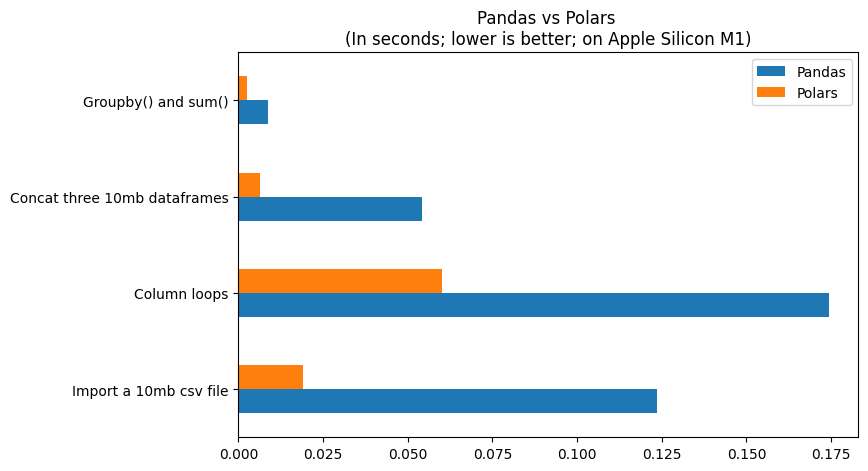

In [15]:
df_cp = pd.DataFrame(compare)
title = 'Pandas vs Polars \n(In seconds; lower is better; on Apple Silicon M1)'
df_cp.plot.barh(figsize=(8,5), title=title)

In [16]:
f"Pandas is {str(df_cp.sum()[0] / df_cp.sum()[1])[:4]}x slower than Polars"

'Pandas is 4.10x slower than Polars'